In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num


In [12]:
df = pd.read_csv('DiaryOfACEO_episodes.csv')

# Print general information about the dataset
print(" \033[1m Info about dataset: \033[0m \n")
df.info()

# Check for missing values and print the missing values count
print("\n Missing values: \n")
missing_data = df.isnull().sum()
print(missing_data)

# Identify rows with missing data
missing_rows = df[df.isnull().any(axis=1)]

# Print the names of the videos (episode names) and the missing data for each
if not missing_rows.empty:
    for i, row in missing_rows.iterrows():
        missing_columns = row[row.isnull()].index.tolist()
        video_name = row['episode_name']  # Assuming 'episode_name' is the column name for the video title
        print(f"Video '{video_name}' is missing data in the following columns: {', '.join(missing_columns)}")
else:
    print("No missing data in the dataset.")



  Info about dataset:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   episode_id               304 non-null    object 
 1   episode_name             304 non-null    object 
 2   release_date             304 non-null    object 
 3   episode_description      303 non-null    object 
 4   views                    304 non-null    int64  
 5   estimatedMinutesWatched  304 non-null    int64  
 6   averageViewDuration      304 non-null    int64  
 7   averageViewPercentage    304 non-null    float64
 8   subscribersGained        304 non-null    int64  
 9   subscribersLost          304 non-null    int64  
 10  likes                    304 non-null    int64  
 11  dislikes                 304 non-null    int64  
 12  comments                 304 non-null    int64  
 13  shares                   304 non-null    int64  
 14  t

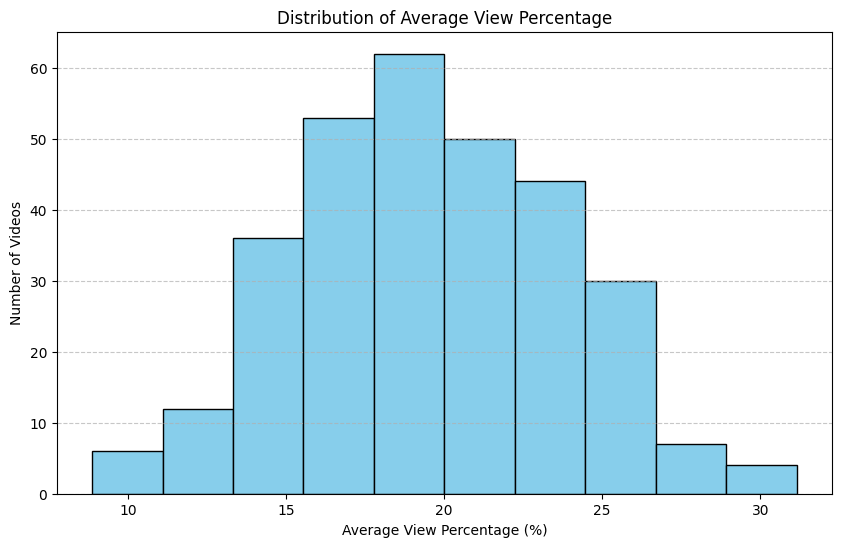

top 10 videos by average view percentage: 

                                          episode_name  averageViewPercentage  \
222  Piers Morgan: Dealing With Repeat Failure, Dea...                  31.15   
300  Reggie Yates Reveals The Secret To Staying Dri...                  30.66   
27   4 Moments On The Diary Of A CEO That Changed M...                  30.59   
303  The Happiness Expert: Retrain Your Brain For M...                  30.56   
81   Jack Maynard: The Untold Story: How Being Thro...                  28.05   
256  Rio Ferdinand's Reveals The Training Ground & ...                  27.18   
292  Russell Howard: How To Laugh Through Fear, Anx...                  27.17   
302  Mel Robbins: This One Hack Will Unlock Your Ha...                  27.05   
262  The Man Who Followed Elon Musk Everywhere: 7 E...                  27.02   
65   The Secret To A Good Nights Sleep with Stephan...                  26.92   

       views  likes  comments  
222  1741238  26627      3677  


In [13]:
#add percentage a on bottom 
#add legend to clarify what everything is

df['averageViewPercentage'] = pd.to_numeric(df['averageViewPercentage'], errors='coerce')

df = df.dropna(subset=['averageViewPercentage'])

plt.figure(figsize=(10, 6))
plt.hist(df['averageViewPercentage'], bins=10, color='skyblue', edgecolor='black')


plt.xlabel('Average View Percentage (%)')
plt.ylabel('Number of Videos')
plt.title('Distribution of Average View Percentage')

# Show Grid for Clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

# Convert averageViewPercentage to numeric and handle invalid data
df['averageViewPercentage'] = pd.to_numeric(df['averageViewPercentage'], errors='coerce')

# Drop rows with missing values in averageViewPercentage
df_clean = df.dropna(subset=['averageViewPercentage'])

# Sort by averageViewPercentage in descending order and select the top 10
top_10_videos = df_clean.sort_values(by='averageViewPercentage', ascending=False).head(10)

# Display the top 10 videos with relevant columns
print("top 10 videos by average view percentage: \n")
print(top_10_videos[['episode_name', 'averageViewPercentage', 'views', 'likes', 'comments']])


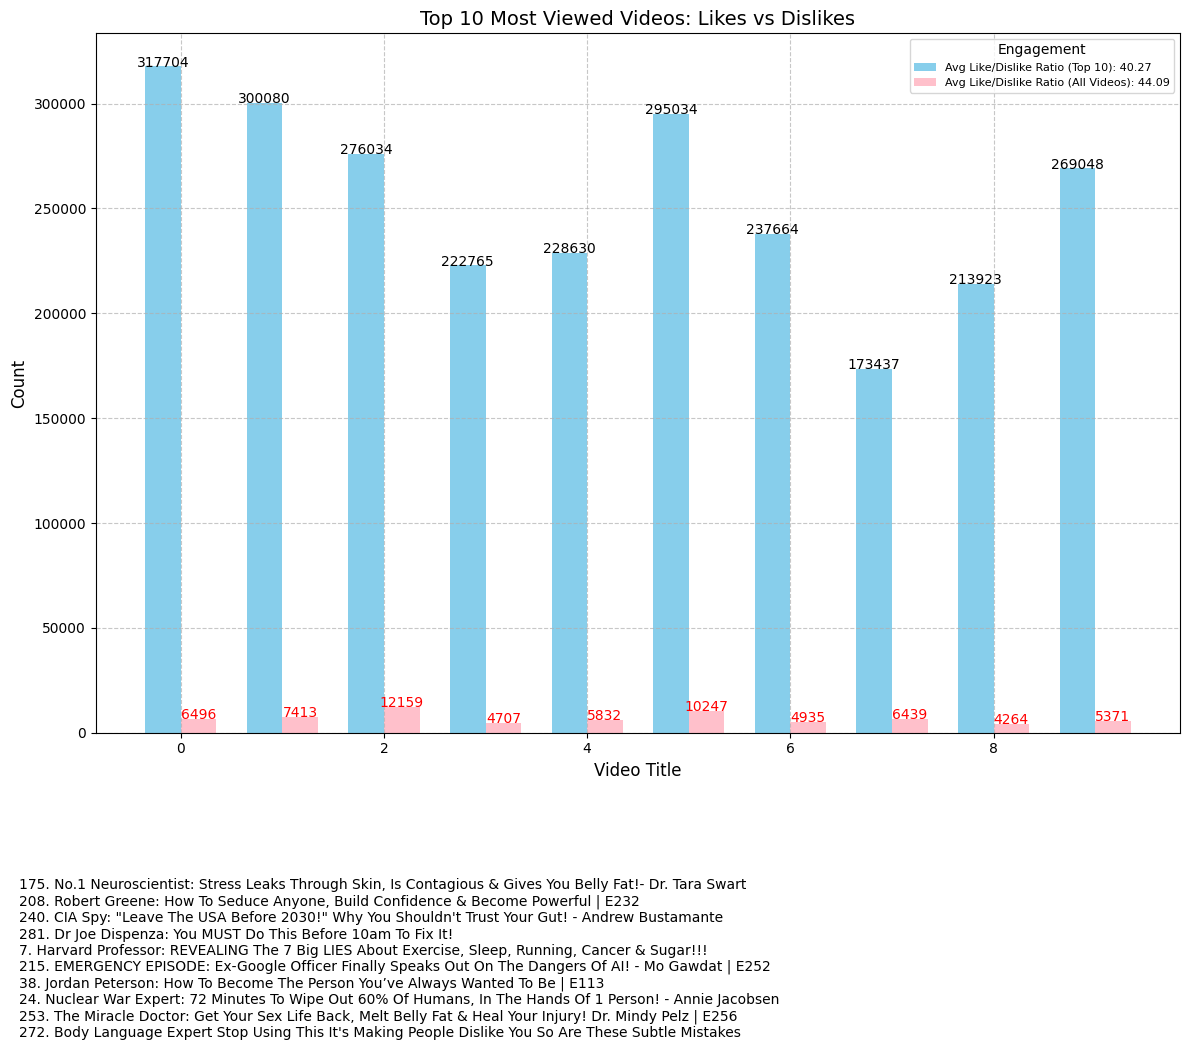

In [14]:
# Convert necessary columns to numeric
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['dislikes'] = pd.to_numeric(df['dislikes'], errors='coerce')

# Calculate the like-to-dislike ratio for each video
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Avoid division by zero

# Select the Top 10 Most Viewed Videos
top_videos = df.nlargest(10, 'views')

# Calculate the average like-to-dislike ratio for the Top 10 Most Viewed Videos
avg_top_like_dislike_ratio = top_videos['like_dislike_ratio'].mean()

# Calculate the average like-to-dislike ratio for all videos
avg_all_like_dislike_ratio = df['like_dislike_ratio'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(top_videos['episode_name']))

# Bar Width
bar_width = 0.35

# Plot Likes
likes_bars = ax.bar(x - bar_width/2, top_videos['likes'], width=bar_width, color='skyblue', label='Likes')

# Plot Dislikes
dislikes_bars = ax.bar(x + bar_width/2, top_videos['dislikes'], width=bar_width, color='pink', label='Dislikes')

# Add the labels above the bars
for i, rect in enumerate(likes_bars):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 50, str(top_videos['likes'].iloc[i]), 
            ha='center', fontsize=10, color='black')

for i, rect in enumerate(dislikes_bars):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 50, str(top_videos['dislikes'].iloc[i]), 
            ha='center', fontsize=10, color='red')



# Set the x-axis label
ax.set_xlabel('Video Title', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Top 10 Most Viewed Videos: Likes vs Dislikes', fontsize=14)
ax.legend(title='Engagement', loc='upper left', fontsize=12)

# Display the average like-to-dislike ratios directly in the title/legend
legend_text = [
    f'Avg Like/Dislike Ratio (Top 10): {avg_top_like_dislike_ratio:.2f}',
    f'Avg Like/Dislike Ratio (All Videos): {avg_all_like_dislike_ratio:.2f}'
]

# Add average ratio to legend
ax.legend(title='Engagement', labels=legend_text, loc='upper right', fontsize=8)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the bottom space for the names to avoid overlap
plt.subplots_adjust(bottom=0.2)  # Adjust this value as needed

# Display the video names below the chart like in the Views Over Time chart
legend_texts = [f"{i+1}. {row['episode_name']}" for i, row in top_videos.iterrows()]
legend_text = "\n".join(legend_texts)
plt.figtext(0.02, -0.3, legend_text, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.show()




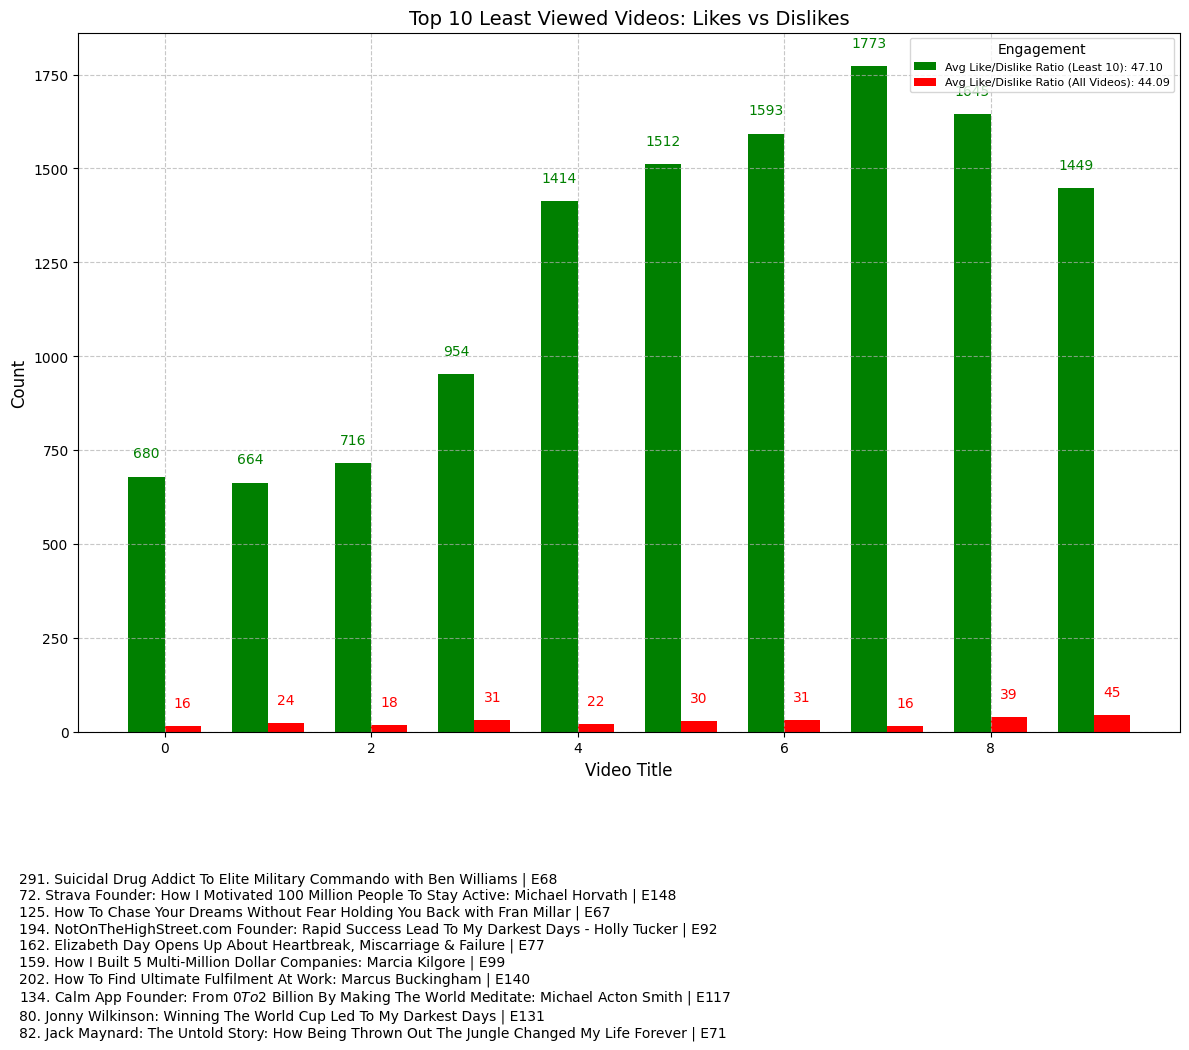

In [15]:
# Select the 10 Least Viewed Videos
least_viewed_videos = df.nsmallest(10, 'views')

# Calculate the average like-to-dislike ratio for the Least 10 Viewed Videos
avg_least_like_dislike_ratio = least_viewed_videos['like_dislike_ratio'].mean()

# Plotting for Least Viewed Videos
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(least_viewed_videos['episode_name']))

# Bar Width
bar_width = 0.35

# Plot Likes
likes_bars = ax.bar(x - bar_width/2, least_viewed_videos['likes'], width=bar_width, color='green', label='Likes')

# Plot Dislikes
dislikes_bars = ax.bar(x + bar_width/2, least_viewed_videos['dislikes'], width=bar_width, color='red', label='Dislikes')

# Add the labels above the bars
for i, rect in enumerate(likes_bars):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 50, str(least_viewed_videos['likes'].iloc[i]), 
            ha='center', fontsize=10, color='green')

for i, rect in enumerate(dislikes_bars):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 50, str(least_viewed_videos['dislikes'].iloc[i]), 
            ha='center', fontsize=10, color='red')

# Set the x-axis label
ax.set_xlabel('Video Title', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Top 10 Least Viewed Videos: Likes vs Dislikes', fontsize=14)
ax.legend(title='Engagement', loc='upper left', fontsize=12)

# Display the average like-to-dislike ratios directly in the title/legend
legend_text = [
    f'Avg Like/Dislike Ratio (Least 10): {avg_least_like_dislike_ratio:.2f}',
    f'Avg Like/Dislike Ratio (All Videos): {avg_all_like_dislike_ratio:.2f}'  # From previous code
]

# Add average ratio to legend
ax.legend(title='Engagement', labels=legend_text, loc='upper right', fontsize=8)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the bottom space for the names to avoid overlap
plt.subplots_adjust(bottom=0.2)  # Adjust this value as needed

# Display the video names below the chart like in the Views Over Time chart
legend_texts = [f"{i+1}. {row['episode_name']}" for i, row in least_viewed_videos.iterrows()]
legend_text = "\n".join(legend_texts)
plt.figtext(0.02, -0.3, legend_text, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.show()


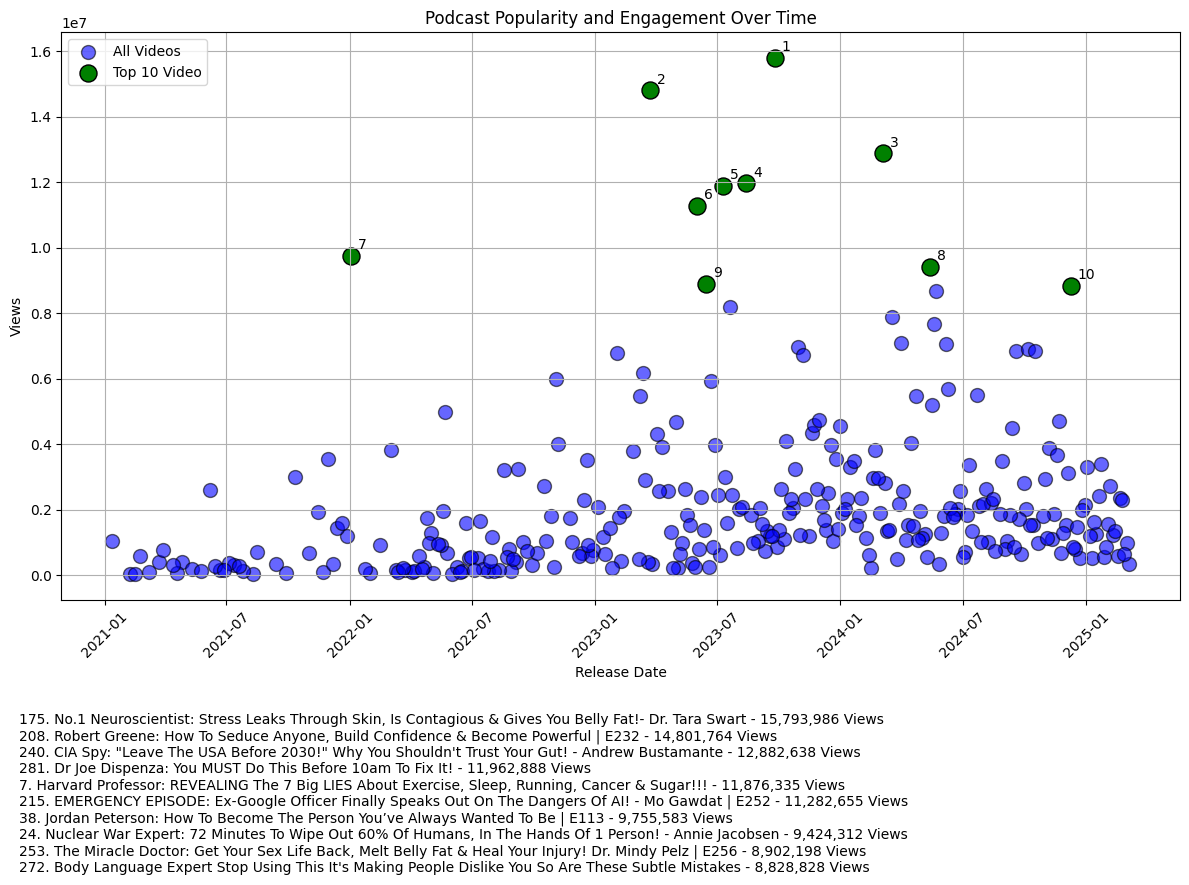

In [18]:
# Ensure release_date is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')

# Select Top 10 videos by views
top_10 = df.nlargest(10, 'views')

# Plotting Views as Dots Over Time
plt.figure(figsize=(12, 7))

# Plot Views as dots (blue)
plt.scatter(df['release_date'], df['views'], color='blue', label='All Videos', s=100, edgecolor='black', alpha=0.6)

# Plot Top 10 Videos with Numbers (green dots)
for index, (i, row) in enumerate(top_10.iterrows()):
    plt.scatter(row['release_date'], row['views'], color='green', s=150, edgecolor='black', label='Top 10 Video' if index == 0 else "")
    plt.annotate(str(index + 1), (row['release_date'], row['views']), textcoords="offset points", xytext=(5,5), fontsize=10, color='black')

# Generate a legend with video names
legend_texts = [f"{i+1}. {row['episode_name']} - {row['views']:,} Views" for i, row in top_10.iterrows()]
legend_text = "\n".join(legend_texts)

# Adding titles and labels
plt.xlabel('Release Date')
plt.ylabel('Views')
plt.title('Podcast Popularity and Engagement Over Time')
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend text below the graph
plt.figtext(0.02, -0.25, legend_text, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
# Ensure numeric conversion and avoid division by zero
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')


top_liked_videos = df.nlargest(10, 'likes')
top_shared_videos = df.nlargest(10, 'shares')


top_liked_text = "Top 10 Liked Videos:\n" + "\n".join(
    [f"{i+1}. {row['episode_name']} - {row['likes']:,} Likes" for i, row in top_liked_videos.iterrows()]
)

top_shared_text = "Top 10 Shared Videos:\n" + "\n".join(
    [f"{i+1}. {row['episode_name']} - {row['shares']:,} Shares" for i, row in top_shared_videos.iterrows()]
)


# Calculate Ratios
df['like_to_view_ratio'] = df['likes'] / (df['views'] + 1)
df['share_to_view_ratio'] = df['shares'] / (df['views'] + 1)

# Calculate averages
avg_like_to_view_ratio = df['like_to_view_ratio'].mean() * 100  # Convert to percentage
avg_share_to_view_ratio = df['share_to_view_ratio'].mean() * 100  # Convert to percentage

# Sort by views for plotting
df_sorted = df.sort_values('views')

# Calculate running averages
df_sorted['running_like_to_view_ratio'] = df_sorted['like_to_view_ratio'].expanding().mean()
df_sorted['running_share_to_view_ratio'] = df_sorted['share_to_view_ratio'].expanding().mean()

# Plotting
plt.figure(figsize=(12, 8))

# Plot Likes-to-Views
plt.scatter(df_sorted['views'], df_sorted['like_to_view_ratio'], color='green', alpha=0.6, label='Likes-to-Views')

# Plot Shares-to-Views
plt.scatter(df_sorted['views'], df_sorted['share_to_view_ratio'], color='blue', alpha=0.6, label='Shares-to-Views')

# Plot Running Averages
plt.plot(df_sorted['views'], df_sorted['running_like_to_view_ratio'], color='darkgreen', label='Running Avg Likes-to-Views', linewidth=3)
plt.plot(df_sorted['views'], df_sorted['running_share_to_view_ratio'], color='darkblue', label='Running Avg Shares-to-Views', linewidth=3)

# Customization
plt.xscale('log')  # Log scale to handle large ranges
plt.xlabel('Views (Log Scale)')
plt.ylabel('Engagement Ratio')
plt.title('Like-to-View and Share-to-View Ratios with Running Averages')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Display averages below the graph (as percentages)
avg_text = f'Avg Likes-to-Views Ratio: {avg_like_to_view_ratio:.2f}%\nAvg Shares-to-Views Ratio: {avg_share_to_view_ratio:.2f}%'
plt.figtext(0.5, -0.1, avg_text, ha='center', va='center', fontsize=12, wrap=True)

plt.figtext(0.02, -0.25, top_liked_text, ha='left', va='top', fontsize=10, wrap=True)
plt.figtext(0.02, -0.55, top_shared_text, ha='left', va='top', fontsize=10, wrap=True)




# Show Plot
plt.tight_layout()
plt.show()



